In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

model = hub.load('https://www.kaggle.com/models/google/hrnet/frameworks/TensorFlow2/variations/hrnet-ade20k-hrnetv2-w48/versions/1')



In [2]:
import tensorflow as tf
from PIL import Image

# Specify the file path of the image
image_path = "/content/drive/MyDrive/Colab Notebooks/1 (1).jpg"

# Load the image using Pillow (PIL)
img = Image.open(image_path)

# Convert the image to a NumPy array
img_array = tf.image.convert_image_dtype(img, dtype=tf.float32)
img_array = tf.expand_dims(img_array, 0)  # Keep the batch dimension for compatibility with the model

# Resize the image to match the expected input shape of the model
target_shape = (800, 800)  # Adjust based on the expected input shape of your model
img_array = tf.image.resize(img_array, target_shape)

# Normalize the pixel values to the range [0, 1]
img_array /= 255.0

# Predictions will have shape (batch_size, h, w, output_classes=150+1)
# Note: an additional class is added for the background.
predictions = model.predict(img_array)
# Features will have shape (batch_size, h/4, w/4, 720)
features = model.get_features(img_array)


In [15]:
print(predictions.shape)

(1, 800, 800, 151)


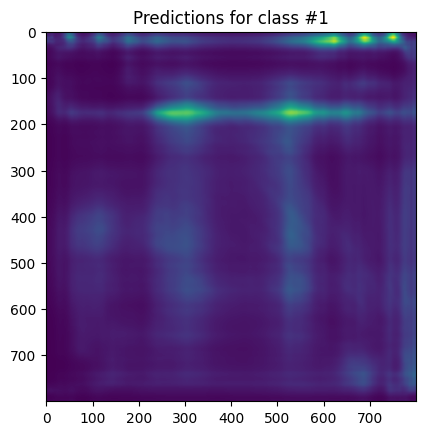

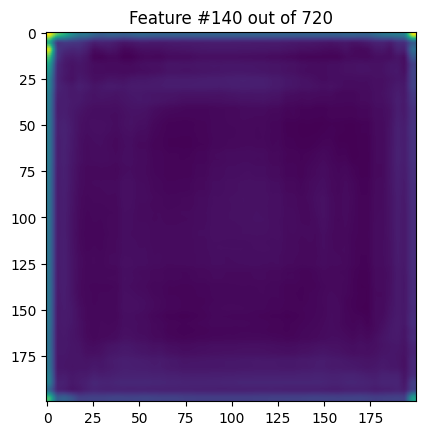

In [19]:
import matplotlib.pyplot as plt

plt.imshow(predictions[0,:,:,40])
plt.title('Predictions for class #1')
plt.show()
plt.imshow(features[0,:,:,250])
plt.title('Feature #140 out of 720')
plt.show()

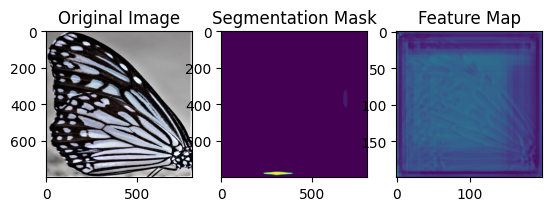

In [7]:
import matplotlib.pyplot as plt

# Assuming predictions is a segmentation mask with shape (batch_size, h, w, output_classes)
# You might need to modify this based on your actual output format

# Assuming predictions is the segmentation mask from the model
segmentation_mask = predictions[0]

# Assuming features is some feature map you want to visualize
feature_map = features[0]

# Display the original image
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")

# Display the predicted segmentation mask
plt.subplot(1, 3, 2)
plt.imshow(tf.argmax(segmentation_mask, axis=-1).numpy())  # Use tf.argmax to find indices
plt.title("Segmentation Mask")

# Display the feature map
plt.subplot(1, 3, 3)
plt.imshow(feature_map[:, :, 0].numpy())  # Convert to numpy if needed
plt.title("Feature Map")

plt.show()


In [12]:
print(img.shape)

(800, 800)
